In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score

0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: 0, Length: 178, dtype: float64


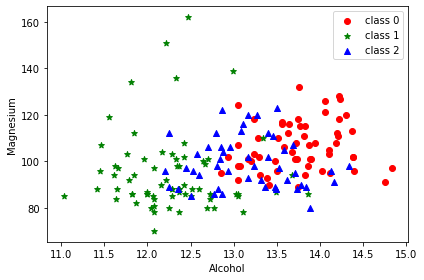

In [4]:
# load wine dataset

wine = datasets.load_wine()
# print(wine.data)

df = pd.DataFrame(data=wine.data)

df["label"] = wine.target
print(df[0])

plt.scatter(df[0][df["label"] == 0], df[4][df["label"] == 0],
            color='red', marker='o', label='class 0')
plt.scatter(df[0][df["label"] == 1], df[4][df["label"] == 1],
            color='green', marker='*', label='class 1')
plt.scatter(df[0][df["label"] == 2], df[4][df["label"] == 2],
            color='blue', marker='^', label='class 2')

plt.legend(loc="upper right")
plt.xlabel("Alcohol")
plt.ylabel("Magnesium")

plt.tight_layout()
plt.show()

In [5]:
X = df.iloc[:, [0,5]]
y = df['label']

Use scikit-learn to split the data

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# 20% -> test set
# 80% -> training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

This is using the training model

In [37]:
svm_train = SVC(kernel='rbf', random_state=1, gamma=1, C=100)

# train the model 

svm_train.fit(X_train, y_train)

SVC(C=100, gamma=1, random_state=1)

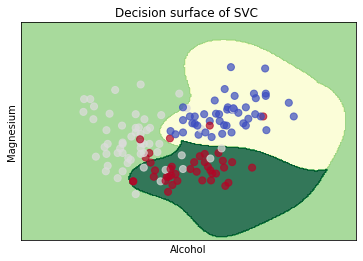

In [38]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of SVC ')
# Set-up grid for plotting.
X_train0, X_train1 = X_train.iloc[:, 0], X_train.iloc[:, 1]
xx_train, yy_train = make_meshgrid(X_train0, X_train1)

plot_contours(ax, svm_train, xx_train, yy_train, cmap=plt.cm.YlGn, alpha=0.8)
ax.scatter(X_train0, X_train1, c=y_train, cmap=plt.cm.coolwarm, s=50, alpha=0.7 )
ax.set_xlabel('Alcohol')
ax.set_ylabel('Magnesium')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [40]:
y_train_pred=svm_train.predict(X_train)

print(accuracy_score(y_train, y_train_pred))

0.8802816901408451


Accuracy with training data: 0.880
with gamma = 1, c=100
Use the test data to evaluate the model

In [41]:
svm_test = SVC(kernel='rbf', random_state=1, gamma=1, C=100)

# train the model 

svm_test.fit(X_test, y_test)

SVC(C=100, gamma=1, random_state=1)

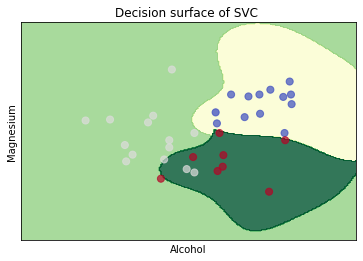

In [42]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of SVC ')
# Set-up grid for plotting.
X_test0, X_test1 = X_test.iloc[:, 0], X_test.iloc[:, 1]
xx_test, yy_test = make_meshgrid(X_test0, X_test1)

plot_contours(ax, svm_train, xx_test, yy_test, cmap=plt.cm.YlGn, alpha=0.8)
ax.scatter(X_test0, X_test1, c=y_test, cmap=plt.cm.coolwarm, s=50, alpha=0.7 )
ax.set_xlabel('Alcohol')
ax.set_ylabel('Magnesium')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [43]:
y_test_pred=svm_train.predict(X_test)

print(accuracy_score(y_test, y_test_pred))

0.8888888888888888


Accuracy with test data: 0.889
with the same gamma and c value.

therefore the model is not overrfitting nor it is underfitting. 